In [ ]:
!rm -vr ~/.kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 777 ~/.kaggle/kaggle.json

removed '/root/.kaggle/logs/kagglehub.log'
removed directory '/root/.kaggle/logs'
removed directory '/root/.kaggle'


In [ ]:
# from ultralytics import YOLO
# from roboflow import Roboflow
# rf = Roboflow(api_key="rEI3w1C5xkPJcmefNDI3")
# project = rf.workspace("sign-arabic-language").project("final-project-kpbmm")
# version = project.version(5)
# dataset = version.download("yolov8")

In [ ]:
!pip install ultralytics


In [ ]:
api_token = {"username":"azzaali","key":"77d4f57492eab11f39f0a5babfc0ed29"}
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
   json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json
# !/bin/bash
!kaggle datasets download -d ammarsayedtaha/arabic-sign-language-dataset-2022
# %%capture
!unzip /content/arabic-sign-language-dataset-2022.zip

Streaming output truncated to the last 5000 lines.
  inflating: datasets/valid/images/23_19_M_haa_7.jpg  
  inflating: datasets/valid/images/23_19_M_haa_8.jpg  
  inflating: datasets/valid/images/23_19_M_jeem_0.jpg  
  inflating: datasets/valid/images/23_19_M_jeem_1.jpg  
  inflating: datasets/valid/images/23_19_M_jeem_2.jpg  
  inflating: datasets/valid/images/23_19_M_jeem_3.jpg  
  inflating: datasets/valid/images/23_19_M_jeem_4.jpg  
  inflating: datasets/valid/images/23_19_M_jeem_5.jpg  
  inflating: datasets/valid/images/23_19_M_jeem_6.jpg  
  inflating: datasets/valid/images/23_19_M_jeem_7.jpg  
  inflating: datasets/valid/images/23_19_M_jeem_8.jpg  
  inflating: datasets/valid/images/23_19_M_kaaf_0.jpg  
  inflating: datasets/valid/images/23_19_M_kaaf_1.jpg  
  inflating: datasets/valid/images/23_19_M_kaaf_2.jpg  
  inflating: datasets/valid/images/23_19_M_kaaf_3.jpg  
  inflating: datasets/valid/images/23_19_M_kaaf_4.jpg  
  inflating: datasets/valid/images/23_19_M_kaaf_5.jpg  

## Libraries

In [ ]:
from ultralytics import YOLO
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


## Visualization

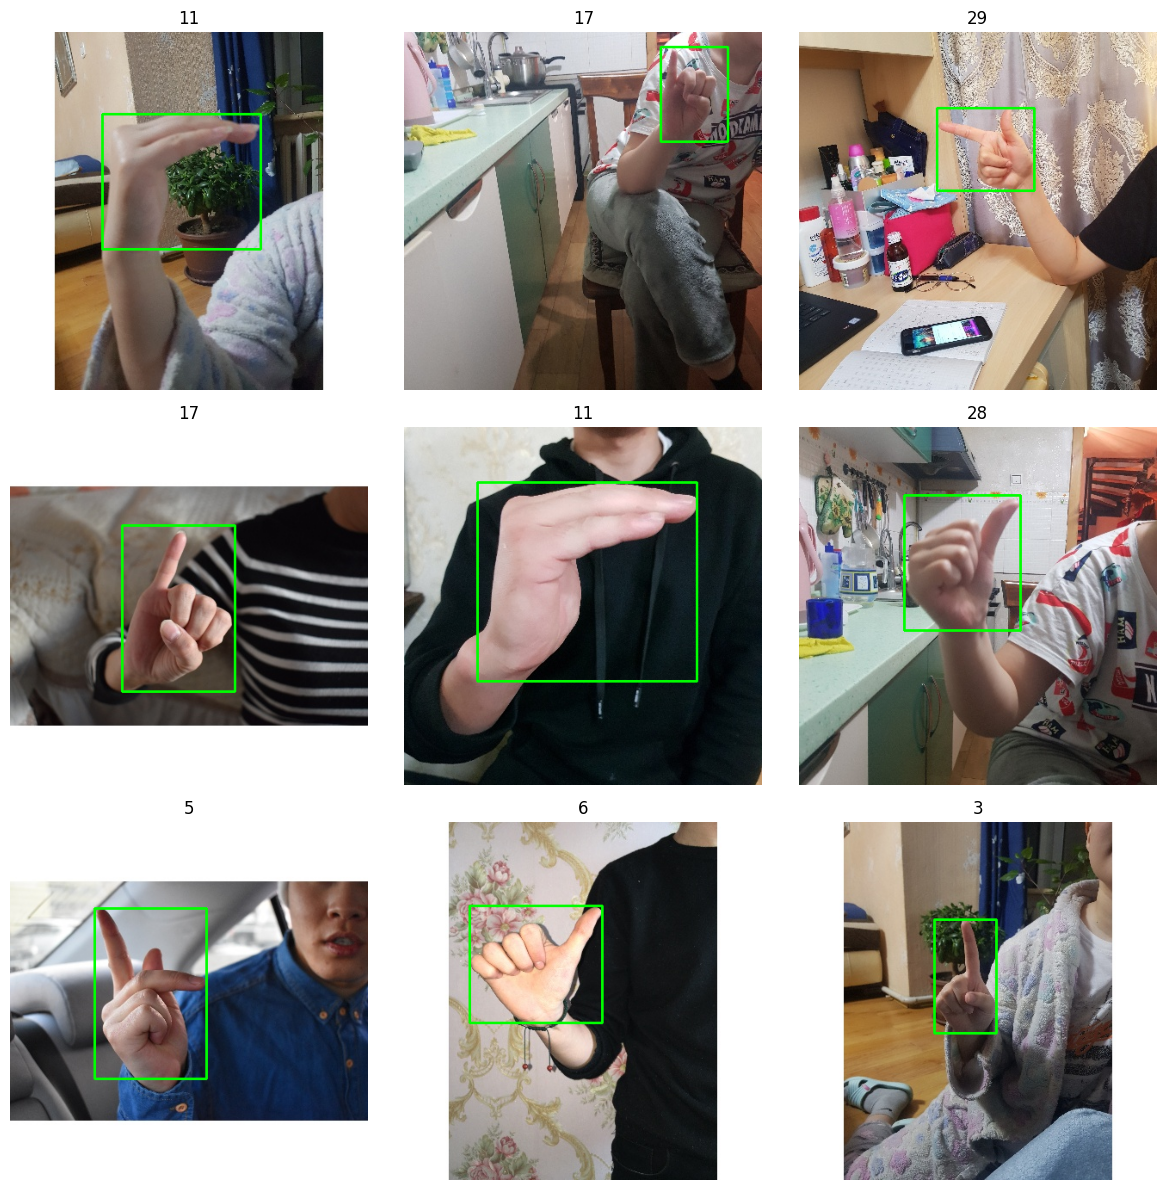

In [ ]:
def read_labels(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
        labels = [line.strip().split() for line in lines]
    return labels

def draw_boxes(image, labels):
    for label in labels:
        class_id = int(label[0])
        x, y, w, h = map(float, label[1:])
        image_height, image_width, _ = image.shape
        x1 = int((x - w / 2) * image_width)
        y1 = int((y - h / 2) * image_height)
        x2 = int((x + w / 2) * image_width)
        y2 = int((y + h / 2) * image_height)
        color = (0, 255, 0)  # Green
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    return image

data_dir = '/content/datasets/train'

image_files = [file for file in os.listdir(os.path.join(data_dir, 'images')) if file.endswith('.jpg')]

random.shuffle(image_files)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for ax, image_file in zip(axes.ravel(), image_files[:9]):
    image_path = os.path.join(data_dir, 'images', image_file)
    label_path = os.path.join(data_dir, 'labels', os.path.splitext(image_file)[0] + '.txt')

    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read labels
    labels = read_labels(label_path)

    # Draw bounding boxes on the image
    image_with_boxes = draw_boxes(image_rgb, labels)

    # Display image with bounding boxes and set the labels as titles
    ax.imshow(image_with_boxes)
    ax.set_title(str(labels[0][0]))
    ax.axis('off')

plt.tight_layout()
plt.show()

## Model

In [ ]:
model = YOLO('yolov8l.yaml')
model = YOLO('yolov8l.pt')
model = YOLO('yolov8l.yaml').load('yolov8l.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 16.1MB/s]


Transferred 355/355 items from pretrained weights


In [ ]:
history = model.train(data='/content/datasets/sign.yaml', epochs=100, imgsz=640,
                    patience = 100, batch = 64,
                    project ="ASL", optimizer = 'Adam', momentum = 0.9,
                    cos_lr=True ,seed = 42, plots = True , close_mosaic = 0, lr0 = 0.001)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/sign.yaml, epochs=1, time=None, patience=100, batch=128, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=ASL, name=train3, exist_ok=False, pretrained=yolov8n.pt, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/azzaelnaggar/asl/9c4a2cc428e24529af860dcc288fafa1

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


TensorBoard: Start with 'tensorboard --logdir ASL/train3', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /content/datasets/train/labels... 9955 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9955/9955 [00:06<00:00, 1517.44it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid/labels... 4247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4247/4247 [00:02<00:00, 1567.74it/s]


val: New cache created: /content/datasets/valid/labels.cache
Plotting labels to ASL/train3/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to ASL/train3
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.146       4.33       1.17        259        256:  26%|██▌       | 20/78 [07:08<19:06, 19.77s/it]

## Evaluation & Metrics Plots

![confusion_matrix.png](attachment:efd3dbf0-5614-4825-aacf-811d1773c0dd.png)
![F1_curve.png](attachment:c5128210-c4ec-4851-a934-6ac81f0e33ce.png)
![P_curve.png](attachment:226e8c23-278f-402e-a0a5-1c8fdd6e8ccc.png)
![PR_curve.png](attachment:82e21500-752e-4e3d-b6b0-01deb7a178f2.png)

## Loading Model (Previously Trained Model Saved)

In [ ]:
# # loading Model
# trained_model = YOLO('ASL.pt')

## Predictions

In [ ]:
test_images_dir = '/content/datasets/valid/images'
test_images = [os.path.join(test_images_dir, image) for image in os.listdir(test_images_dir)]

test_samples = np.random.choice(test_images, 10, replace=False)

print(test_samples)

In [ ]:
results = model([test_samples[0], test_samples[1], test_samples[2], test_samples[3], test_samples[4], test_samples[5], test_samples[6], test_samples[7], test_samples[8], test_samples[9]])

results_dir = "results_tries"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

i = 0
for result in results:
    boxes = result.boxes
    masks = result.masks
    keypoints = result.keypoints
    probs = result.probs

    # Save image
    filename = os.path.join(results_dir, f"result_{i}.jpg")
    result.save(filename=filename)
    # result.show() # Uncomment to display image
    i+=1


In [ ]:
directory = "results_tries"

images = []
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        img = plt.imread(os.path.join(directory, filename))
        images.append(img)

fig, axs = plt.subplots(2, 5, figsize=(50, 25))
for i in range(10):
    axs[i//5, i%5].imshow(images[i])
    axs[i//5, i%5].axis('off')

plt.show()

## Inference (Use this code when you have your saved trained model + a webcam to capture the frames)

In [ ]:
# import cv2
# from ultralytics import YOLO

# # Load the model
# model = YOLO('ASL.pt') # Your saved model's name

# # Open the camera
# cap = cv2.VideoCapture(0)

# # Setting width and height of the video
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)


# while cap.isOpened():

#     success, frame = cap.read()

#     if success:

#         results = model.track(frame, persist=True)


#         annotated_frame = results[0].plot()

#         cv2.imshow("ASL Tracking", annotated_frame)

#         # Break the loop if 'q' is pressed
#         if cv2.waitKey(1) & 0xFF == ord("q"):
#             break
#     else:
#         # Break the loop if
#         break

# cap.release()
# cv2.destroyAllWindows()
